In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data_exam.csv')

In [3]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [4]:
df.head()

,X,Y,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


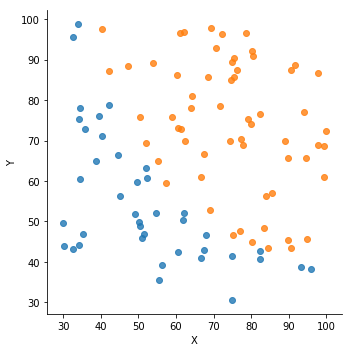

In [5]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()

In [6]:
#Adding polynomial features
X['x^2'] = X['X'] ** 2

In [7]:
X['Y^2'] = X['Y'] ** 2
X['X_Y'] = X['X'] * X['Y']

In [8]:
X.head()

,X,Y,x^2,Y^2,X_Y
0,34.623660,78.024693,1198.797805,6087.852690,2701.500406
1,30.286711,43.894998,917.284849,1926.770807,1329.435094
2,35.847409,72.902198,1285.036716,5314.730478,2613.354893
3,60.182599,86.308552,3621.945269,7449.166166,5194.273015
4,79.032736,75.344376,6246.173368,5676.775061,5954.672216


In [9]:
X = (X - np.mean(X))/np.std(X)

In [10]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [11]:
X.head()

,bias,X,Y,x^2,Y^2,X_Y
0,1.0,-1.602248,0.638341,-1.375110,0.546497,-0.926245
1,1.0,-1.826256,-1.207541,-1.486182,-1.124797,-1.702527
2,1.0,-1.539040,0.361294,-1.341084,0.235973,-0.976116
3,1.0,-0.282101,1.086368,-0.419043,1.093267,0.484106
4,1.0,0.691528,0.493378,0.616362,0.381388,0.914321


In [12]:
#splitting into training and test set

In [13]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [14]:
w = np.random.normal(0,1,X.shape[1])

In [15]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [16]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [17]:
lemda = 0.001

In [18]:
def gradient_descent(w,alpha,num_iters,lemda):
    theta = []
    cost = []
    lembda_mat = lemda * np.identity(X.shape[1])
    lembda_mat[0][0] = 0
    for i in range(num_iters):
        pred = np.dot(X_train,w)
        h = sigmoid(pred)
        error = loss(Y_train,h) + lemda * np.dot(w.T, w)
        grad = (np.dot(X_train.T,h- Y_train) + np.matmul(lembda_mat,w))/Y_train.size
        theta.append(w)
        cost.append(error)
        w = w - alpha * grad
    return cost,theta

In [19]:
cost, theta = gradient_descent(w,0.3,500,lemda)

Text(0,0.5,'value of cost')

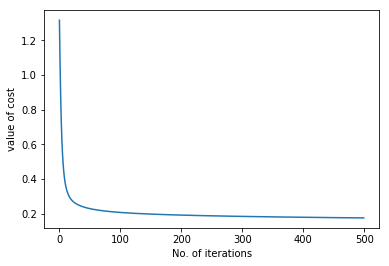

In [20]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [21]:
theta = theta[-1]

In [22]:
theta

array([2.28338045, 0.67601284, 0.4315982 , 0.37737796, 0.91442016,
       4.25536521])

In [23]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [24]:
a = pred(X_test)

In [25]:
a = a >= 0.5
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [26]:
Y_test = Y_test.reset_index(drop=True)

In [27]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [28]:
predicted_data

,label,Actual_label
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,0,1
9,1,0


In [29]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [30]:
accuracy

0.8666666666666667

In [31]:
plot_data = pd.concat([X,Y],axis=1)

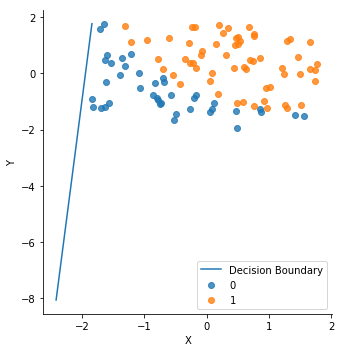

In [32]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="X", y="Y", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['X'])
x_1 = max(plot_data['X'])

plt.plot([x_0,1 * -(theta[0] + theta[1]* x_0)/theta[2]], [ x_1,1 * -(theta[0] + theta[1]* x_1)/theta[2] ],label = "Decision Boundary")
# Move the legend to an empty part of the plot
plt.legend(loc='best')


In [33]:
plot_data.drop(labels=['x^2','Y^2','X_Y'],axis = 1)

,bias,X,Y,label
0,1.0,-1.602248,0.638341,0
1,1.0,-1.826256,-1.207541,0
2,1.0,-1.539040,0.361294,0
3,1.0,-0.282101,1.086368,1
4,1.0,0.691528,0.493378,1
5,1.0,-1.061997,-0.535739,0
6,1.0,-0.234372,1.638184,1
7,1.0,0.484511,-1.063730,1
8,1.0,0.539987,1.146511,1
9,1.0,0.970448,-1.227099,1
